## DSAP107

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng as ssl
import statsmodels.stats.outliers_influence as sso
import math

### Summary Statistics

In [2]:
or107 = pd.read_excel('../../data/semester regression data/OR107.xlsx')
print('Head of dataset:')
display(or107.head())

print("Tail of dataset:")
display(or107.tail())

Head of dataset:


,student_id,project,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,most_watch_period,watched_video,avg_playback_rate
0,88,NaN,NaN,12633.775000,0.223206,361,10,47,1,6,7,0,0,4,0,8,period 5,19,1.161569
1,89,92.69,41.0,38527.933333,0.810799,3195,30,1427,32,4,3,0,1,16,11,12,period 3,43,1.400646
2,90,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,period 0,0,0.000000
3,91,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,period 0,0,0.000000
4,92,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,period 0,0,0.000000


Tail of dataset:


,student_id,project,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,most_watch_period,watched_video,avg_playback_rate
78,166,94.76,70.0,3979.116667,0.093494,428,64,2596,340,7,1,0,0,5,6,4,period 4,16,1.686555
79,167,NaN,NaN,5726.700000,0.114359,82,1,0,0,0,1,0,0,3,5,1,period 4,10,1.328165
80,168,94.61,75.0,29035.216667,0.648963,5884,54,13649,213,3,14,13,0,5,7,9,period 0,48,1.499558
81,169,98.50,82.0,31742.950000,0.666878,1455,11,1519,11,4,13,0,15,23,3,4,period 3,58,1.417638
82,170,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,period 0,0,0.000000


In [3]:
or107.dropna()

,student_id,project,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,most_watch_period,watched_video,avg_playback_rate
1,89,92.69,41.0,38527.933333,0.810799,3195,30,1427,32,4,3,0,1,16,11,12,period 3,43,1.400646
8,96,92.69,40.0,5517.000000,0.070298,111,3,0,0,0,0,0,0,2,5,2,period 4,9,1.000000
9,97,91.19,72.0,5902.366667,0.124426,103,2,155,1,2,8,0,0,2,1,2,period 0,13,1.367248
10,98,89.78,78.0,14392.633333,0.307080,9640,269,13198,1711,32,10,8,0,3,11,8,period 4,40,1.351594
12,100,95.00,71.0,16708.100000,0.473660,6808,183,2893,123,12,0,10,1,14,3,1,period 3,29,1.990651
13,101,97.35,66.0,26279.650000,0.646682,4697,126,5322,327,8,19,0,0,0,7,22,period 5,48,1.730160
14,102,90.19,89.0,25164.866667,0.564365,1360,29,1308,32,0,10,0,0,2,6,31,period 5,49,1.481709
15,103,91.19,46.0,17842.216667,0.501757,1956,83,1892,121,0,6,0,27,2,0,2,period 2,37,1.878018
16,104,92.69,88.0,19351.016667,0.549704,876,130,577,106,9,14,0,2,4,5,21,period 5,46,1.891890
17,105,87.94,81.0,33848.733333,0.649105,1092,30,3503,44,3,5,1,27,5,2,11,period 2,51,1.290211


In [4]:
#summary statistics
or107.describe()

,student_id,project,final,total_watch_time,watch_freq,backward_sec,backward_times,forward_sec,forward_times,pause_freq,period 0,period 1,period 2,period 3,period 4,period 5,watched_video,avg_playback_rate
count,83.000000,52.000000,52.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,129.000000,91.274615,71.115385,18548.041466,0.405121,4250.289157,117.048193,4427.433735,200.626506,49.132530,5.084337,0.759036,2.987952,5.554217,6.433735,9.060241,29.879518,1.136725
std,24.103942,13.410280,16.283823,15457.478642,0.335793,8015.716038,207.394869,8559.996863,423.617370,308.763378,7.121258,2.417368,5.623327,6.822225,7.143465,9.636502,22.440924,0.642992
min,88.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.500000,90.800000,65.250000,2009.816667,0.043900,11.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.025470
50%,129.000000,92.690000,74.500000,18924.783333,0.444005,1360.000000,39.000000,1427.000000,44.000000,4.000000,1.000000,0.000000,0.000000,3.000000,5.000000,6.000000,37.000000,1.351594
75%,149.500000,95.000000,82.000000,31491.175000,0.655524,4379.500000,116.500000,5828.000000,160.000000,12.000000,8.500000,0.000000,4.000000,8.500000,9.500000,14.000000,51.500000,1.493317
max,170.000000,98.500000,98.000000,63713.400000,1.391923,57193.000000,1015.000000,49991.000000,2811.000000,2811.000000,26.000000,13.000000,27.000000,33.000000,32.000000,39.000000,65.000000,1.990651


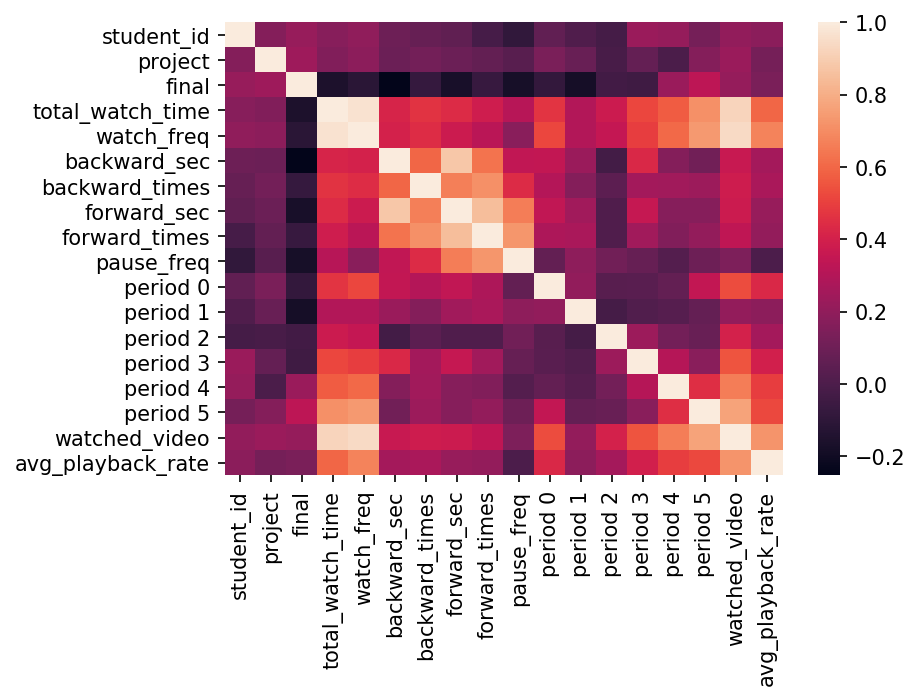

In [8]:
corr = or107.corr()
_ = sns.heatmap(corr)

### Scatter Diagram

#### Final

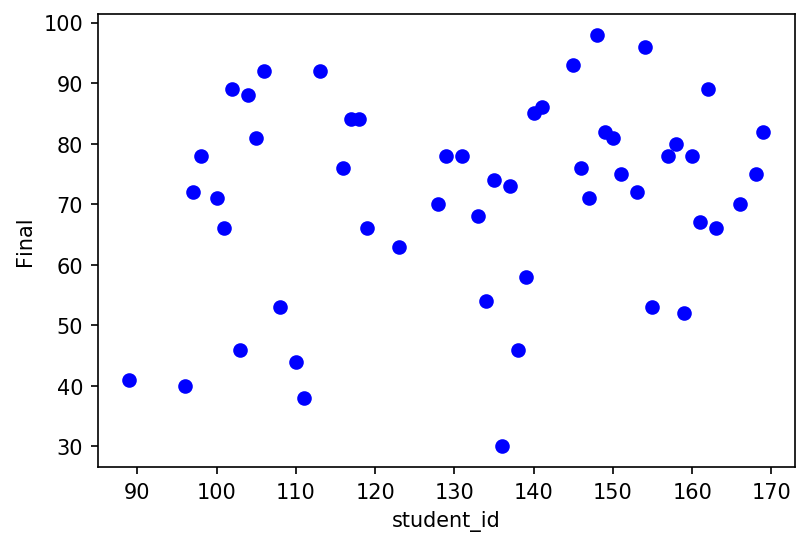

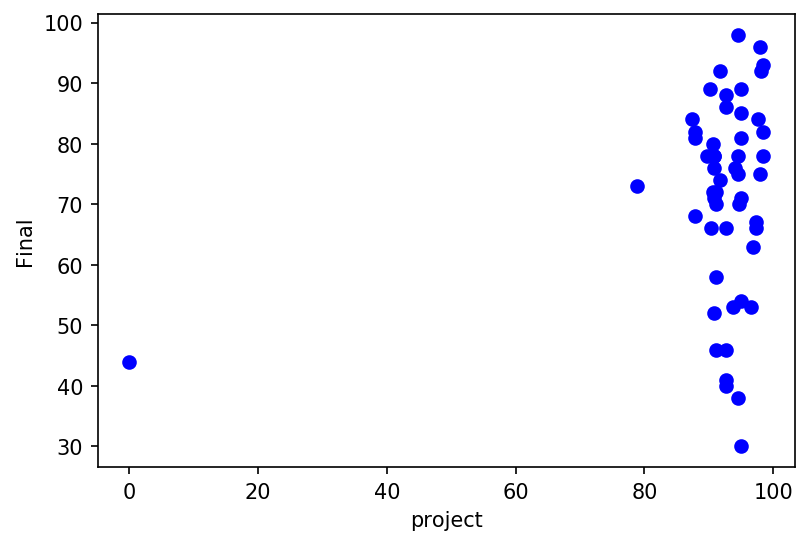

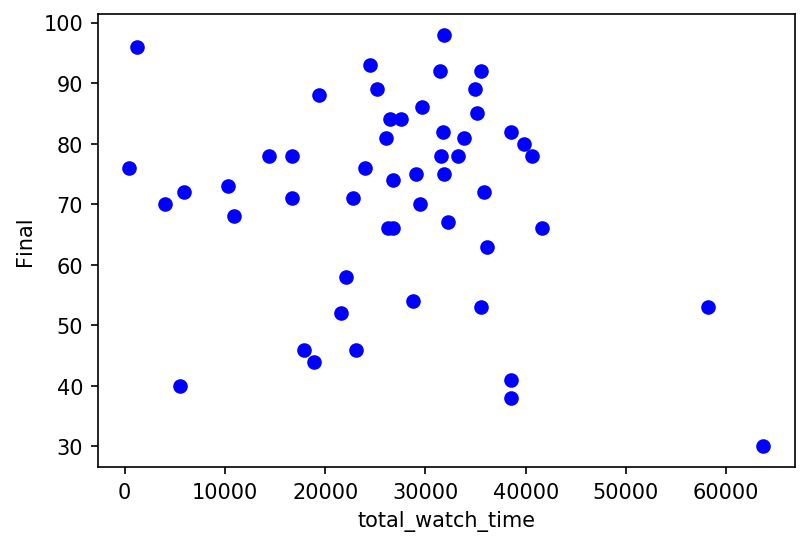

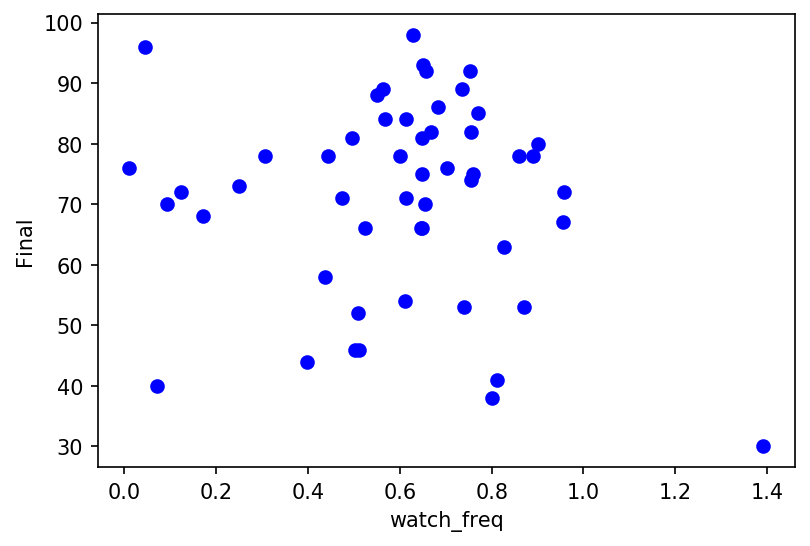

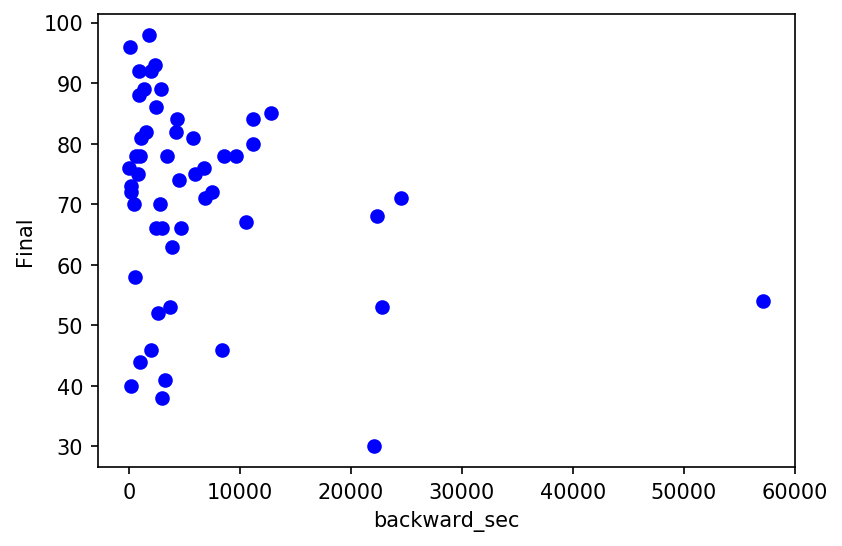

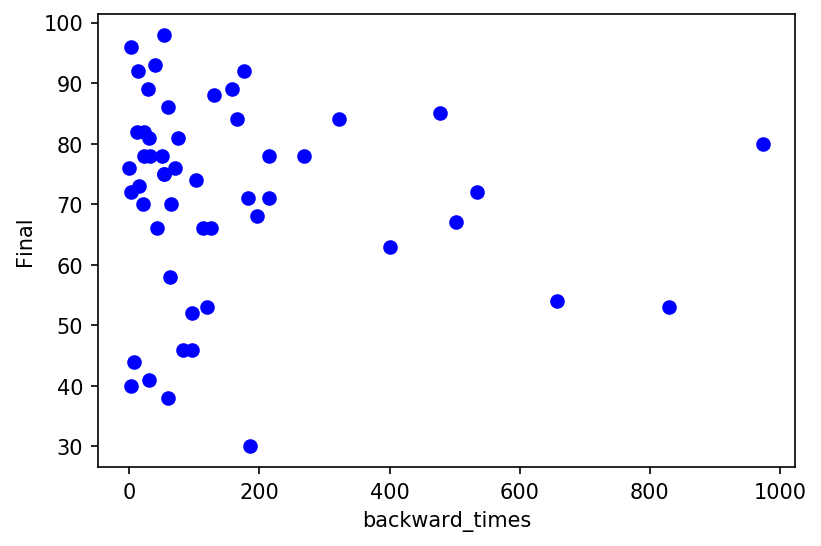

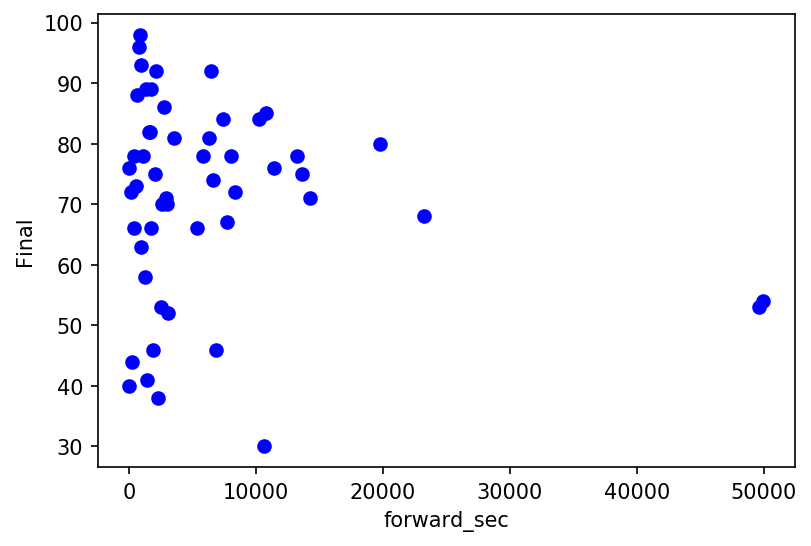

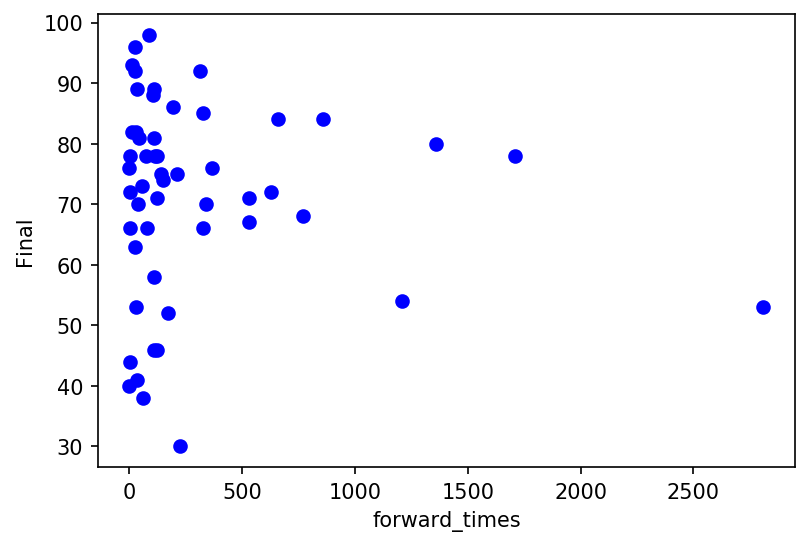

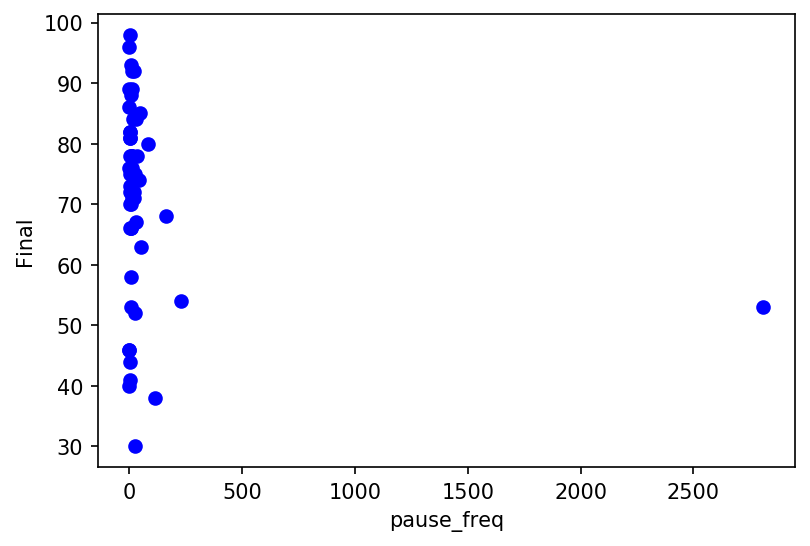

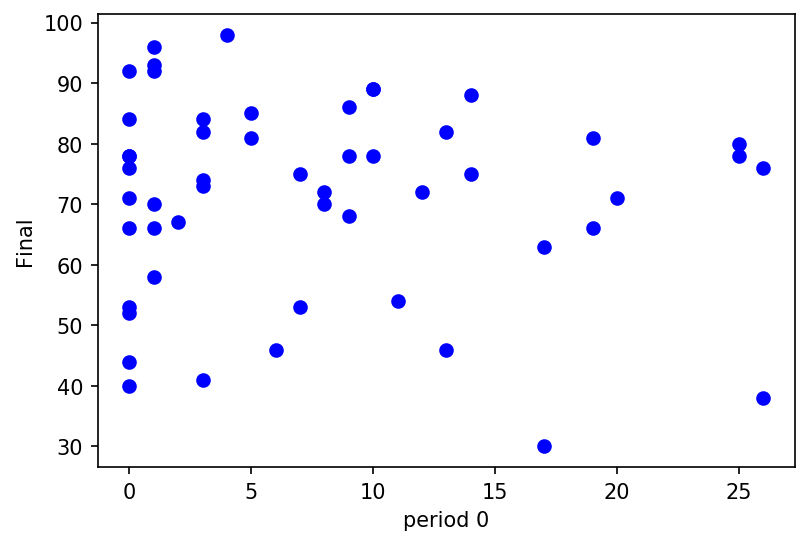

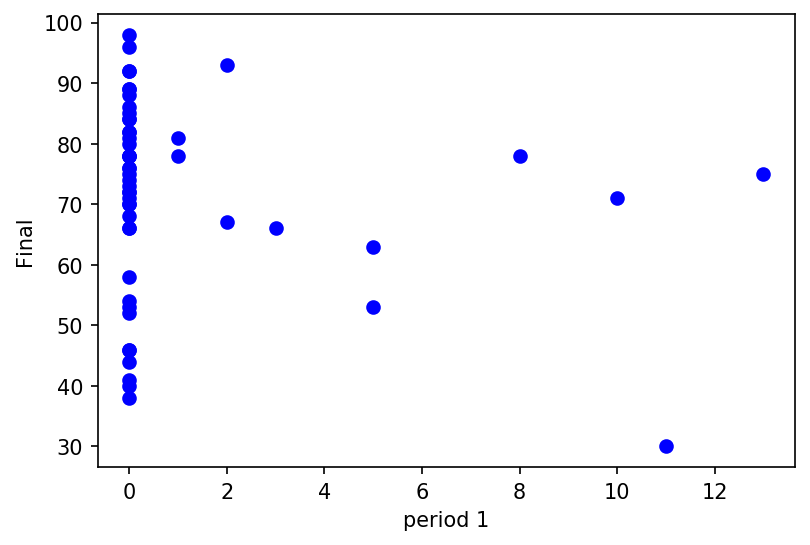

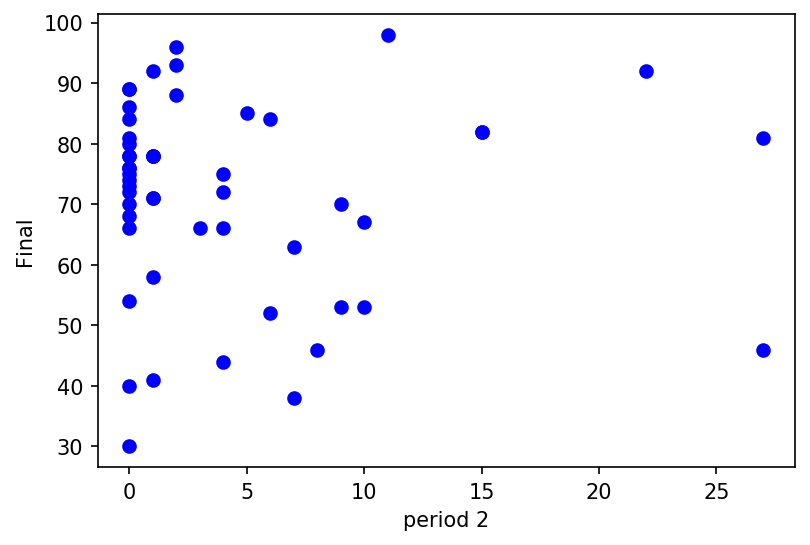

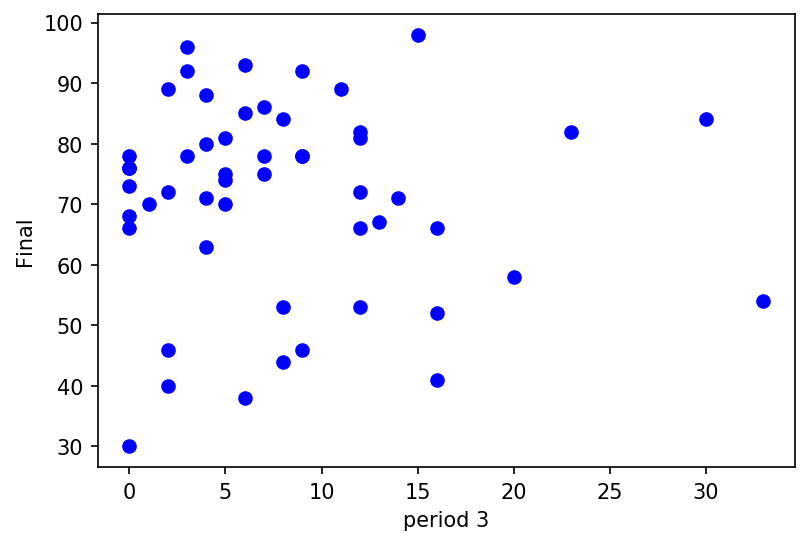

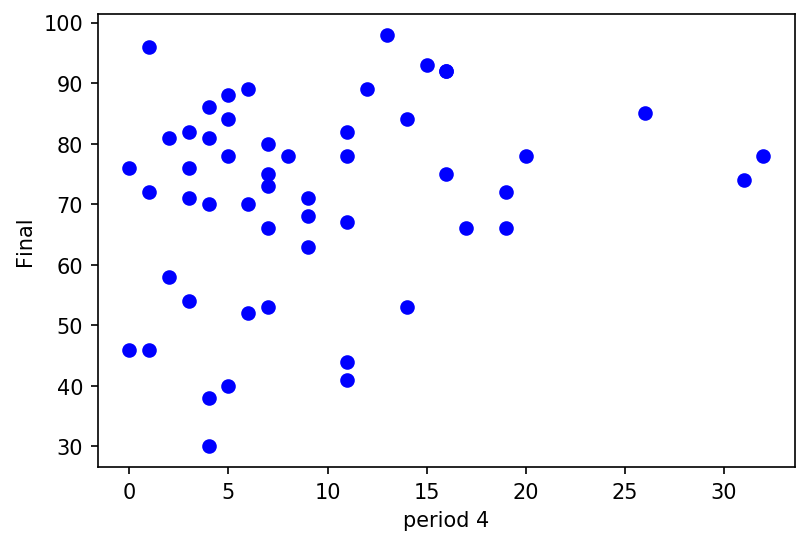

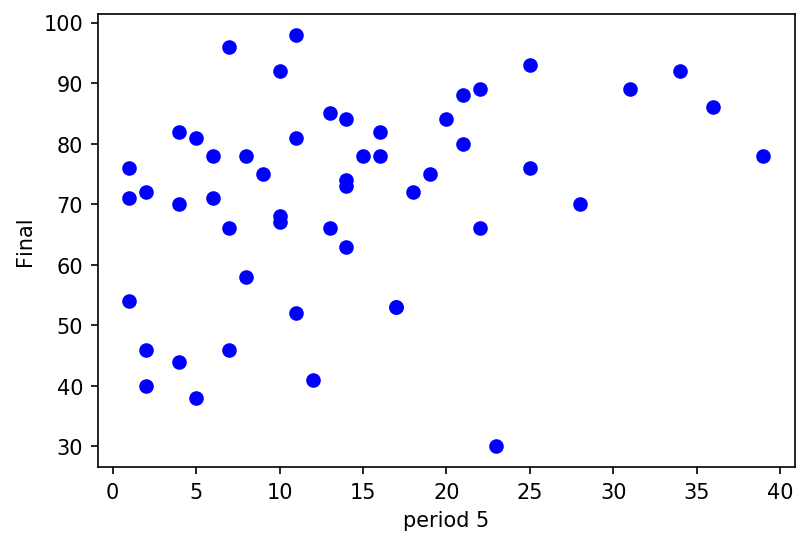

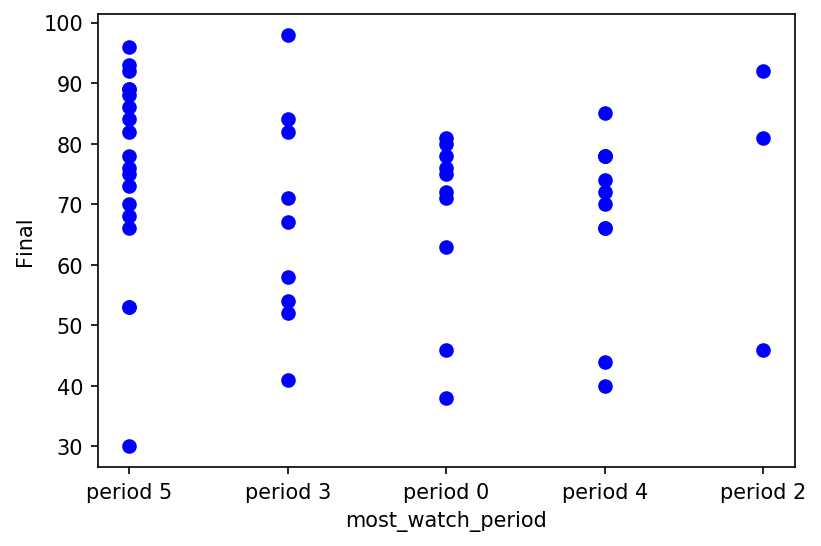

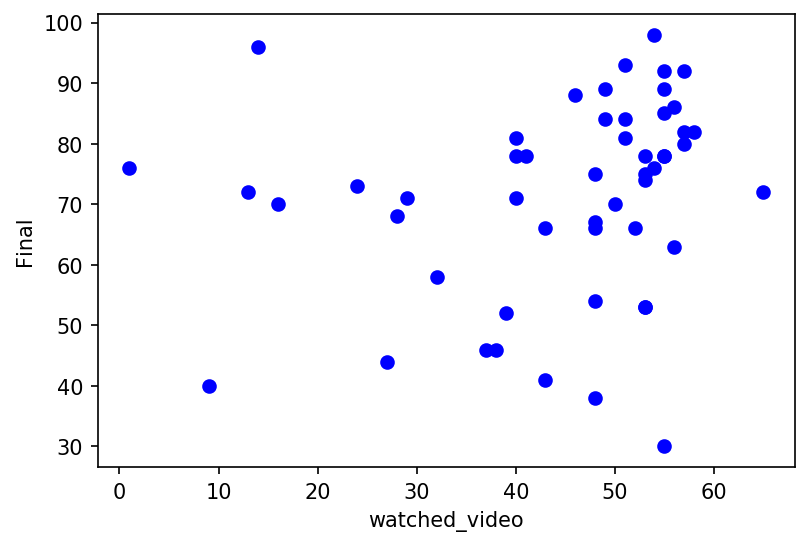

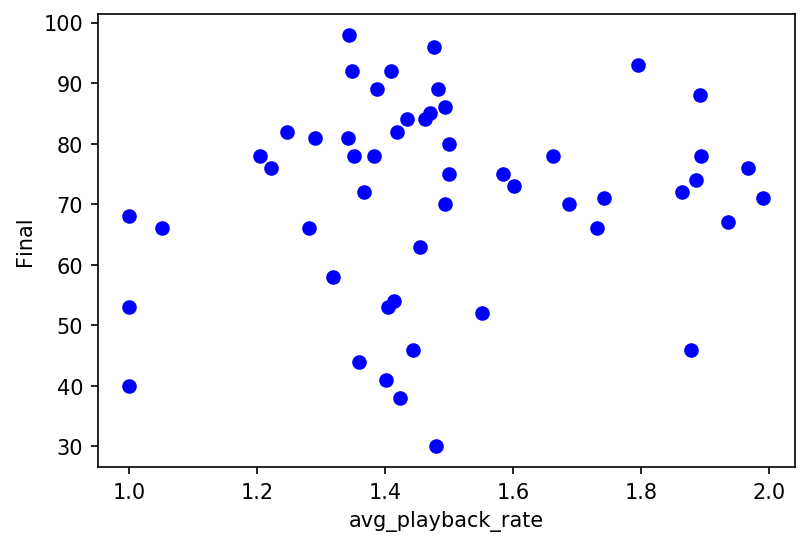

In [7]:
y = or107['final'].values
xnames = or107.columns.drop(['final'])
for aname in xnames:
    x = or107[aname].values

    _ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Final')
    plt.show()